In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('new_data_task1\merged_order_df1.csv')
df['date'] = pd.to_datetime(df['order_purchase_timestamp'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['dayofyear'] = df.date.dt.dayofyear
df['dayofweek'] = df.date.dt.dayofweek
df['date_day'] = pd.to_datetime(df[['year', 'month', 'day']])

df.set_index('date_day', inplace=True)
df.sort_index(inplace=True)

grouped = df.groupby(['product_category_name_english', pd.Grouper(freq='D')])['price'].sum().reset_index()

# Функція для прогнозування
def forecast_demand(grouped_df):
    forecasts = {}  
    all_categories_dfs = []  
    categories = grouped_df['product_category_name_english'].unique()  # унікальні категорії товарів

    for category in categories[:]:  # ітерація по кожній категорії товарів
        category_df = grouped_df[grouped_df['product_category_name_english'] == category]  

        # Відновлення відсутніх дат та значень ціни
        category_df.index = category_df['date_day']  
        category_df = category_df.resample('D').asfreq()  # ресемплювання до щоденного періоду для відновлення відсутніх дат
        category_df['date_day'] = pd.to_datetime(category_df.index) 
        category_df['year'] = category_df.date_day.dt.year 
        category_df['month'] = category_df.date_day.dt.month 
        category_df['day'] = category_df.date_day.dt.day  
        category_df['dayofyear'] = category_df.date_day.dt.dayofyear 
        category_df['dayofweek'] = category_df.date_day.dt.dayofweek 

        category_df['product_category_name_english'] = category  

        category_df['price'] = category_df['price'].fillna(0)

        model = SARIMAX(category_df['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        result = model.fit()
        forecast = result.forecast(steps=21) 

        forecasts[category] = forecast  
        all_categories_dfs.append(category_df)  

    return forecasts, all_categories_dfs  

demand_forecast, all_categories_dfs = forecast_demand(grouped)

c:\Users\Микола\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Микола\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Микола\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Микола\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

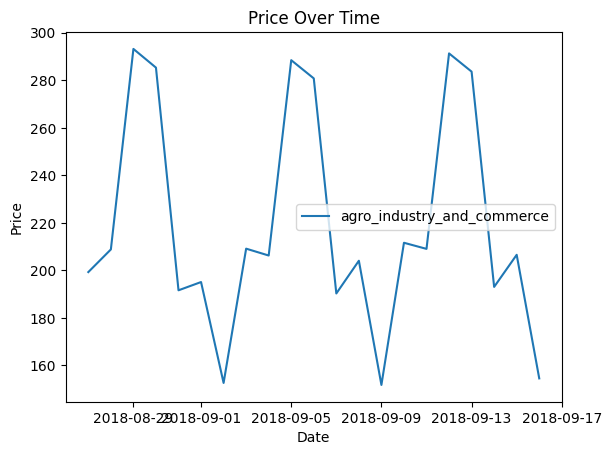

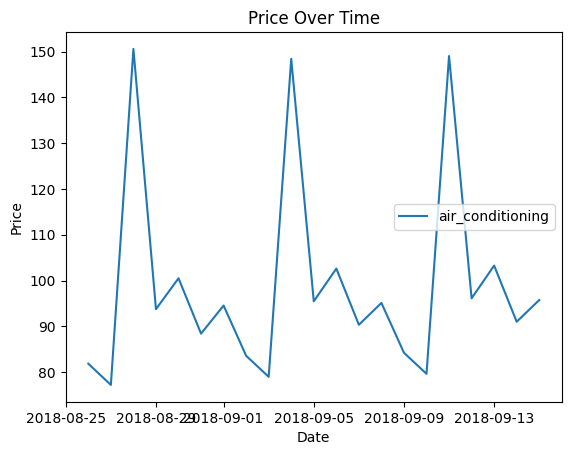

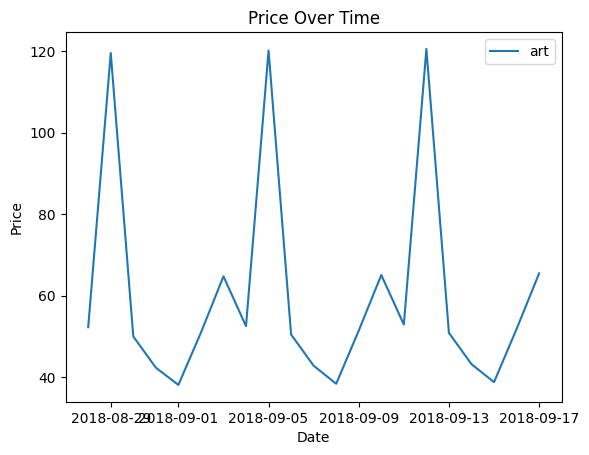

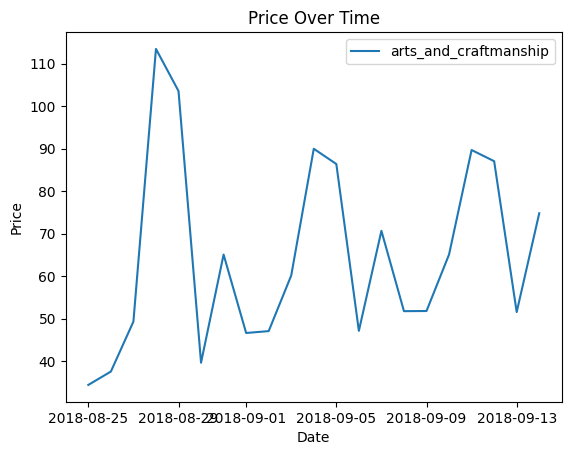

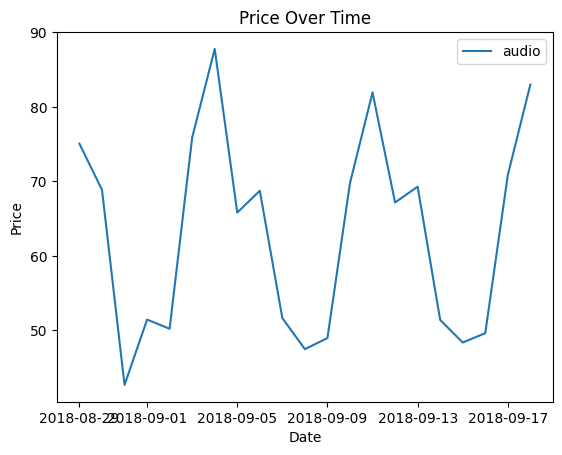

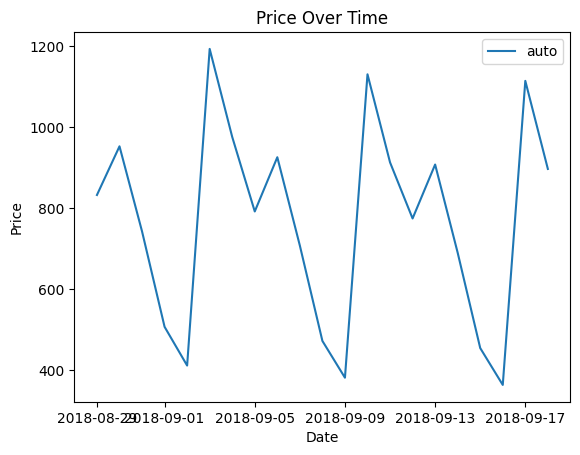

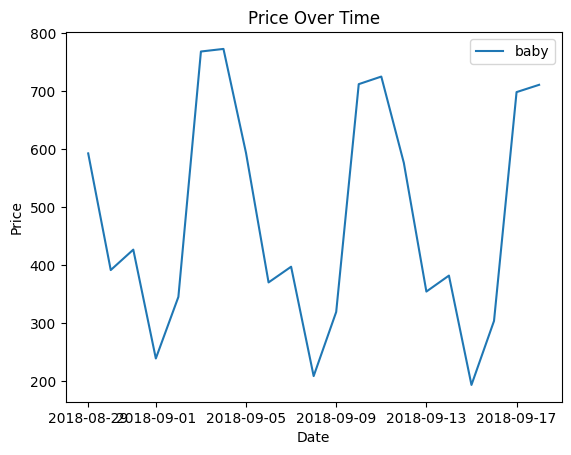

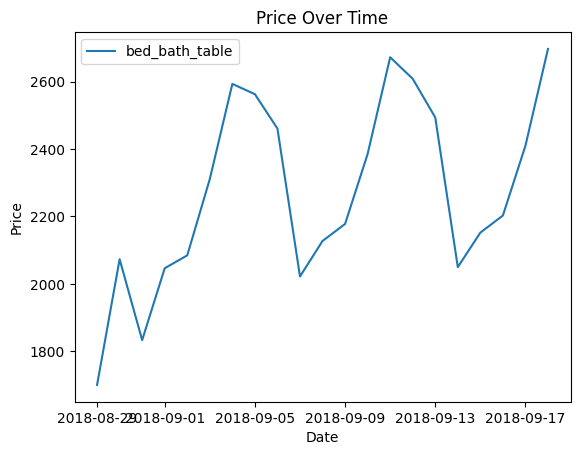

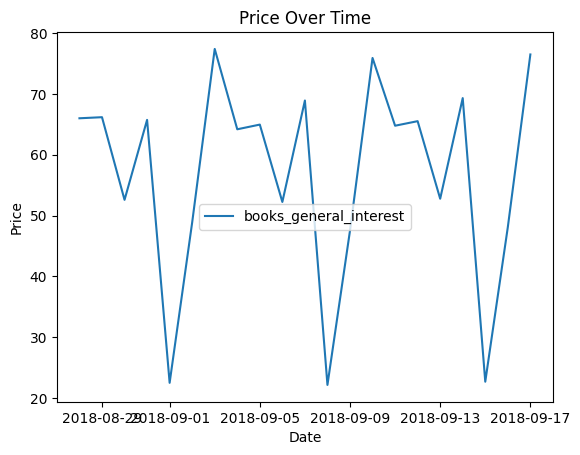

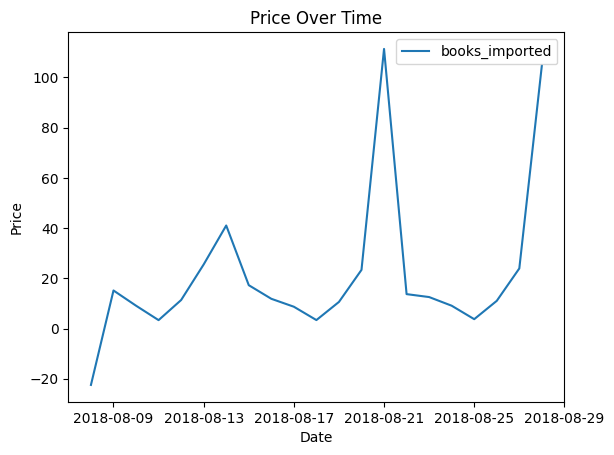

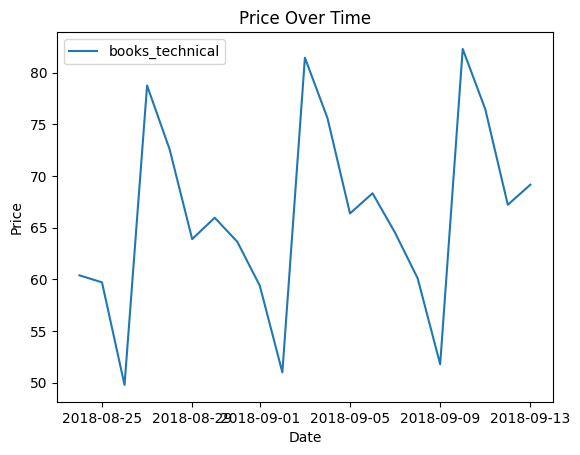

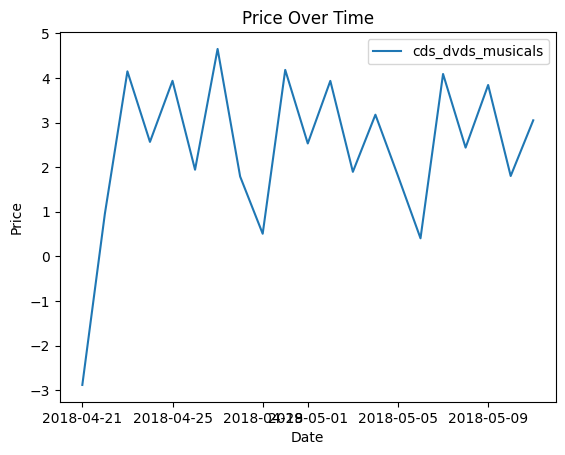

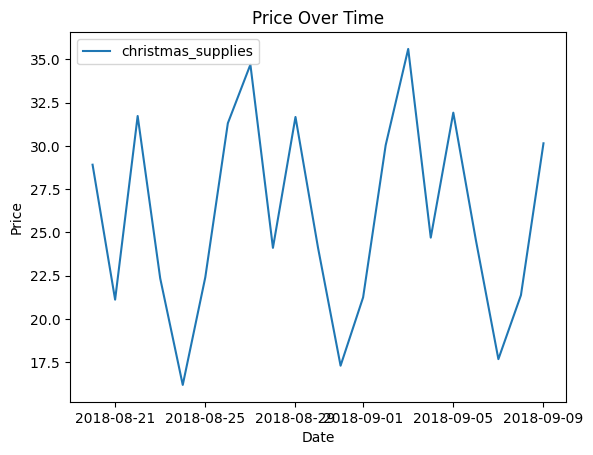

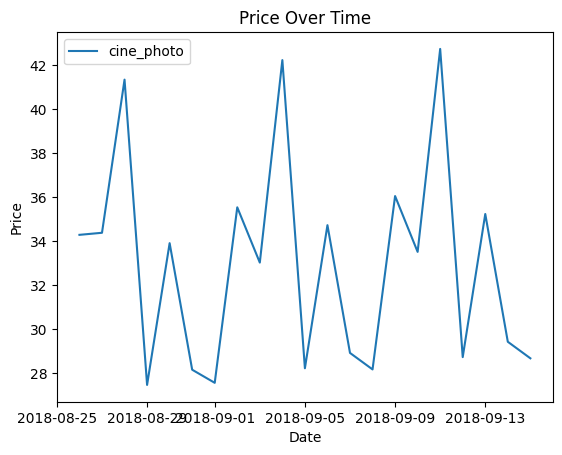

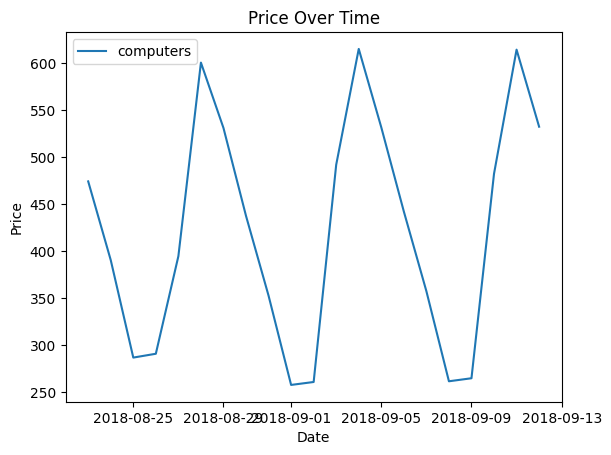

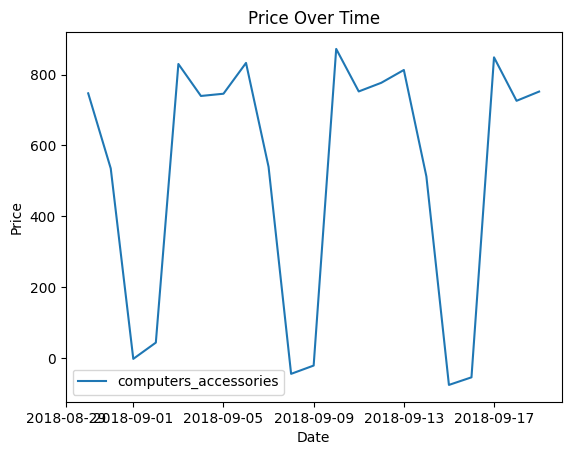

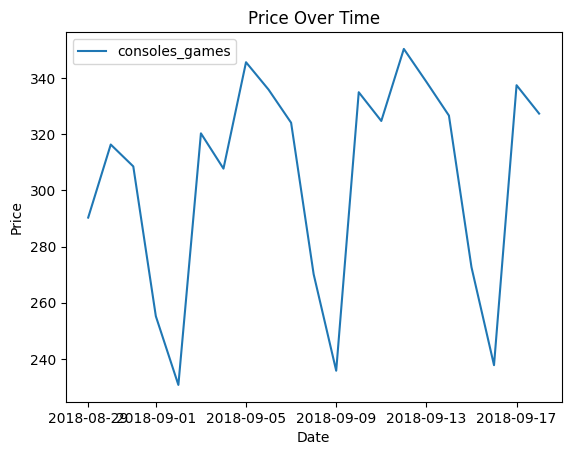

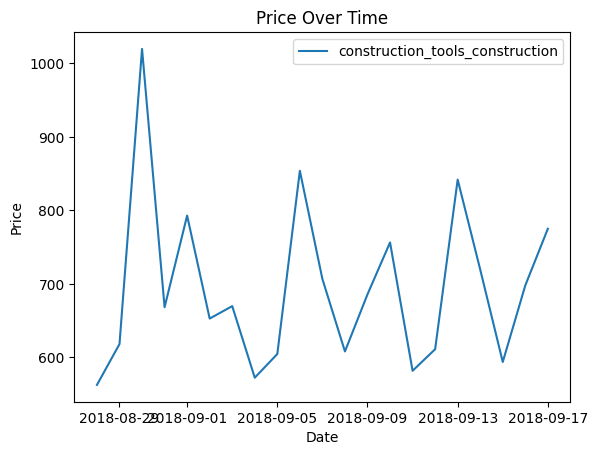

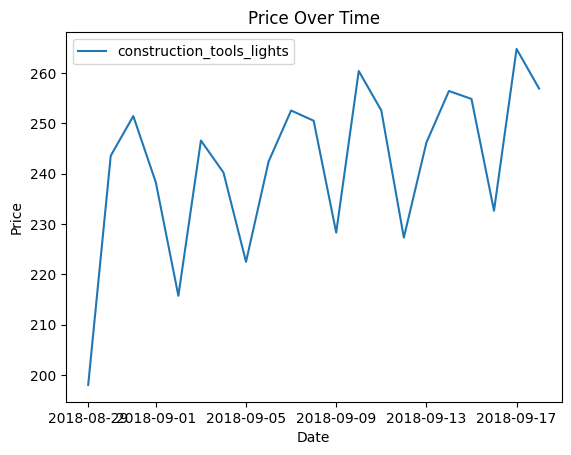

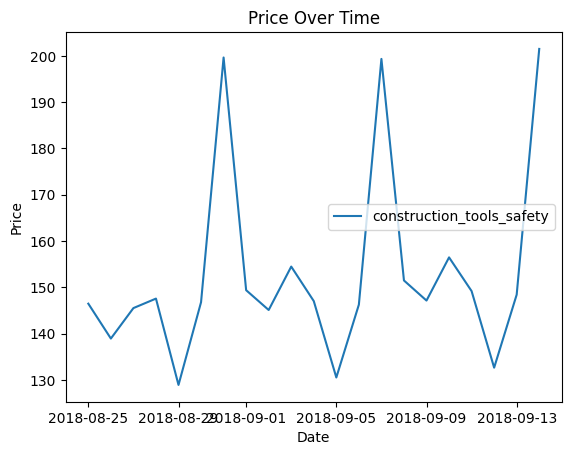

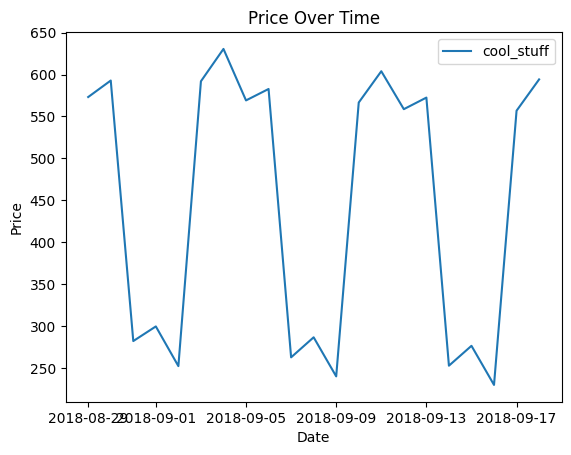

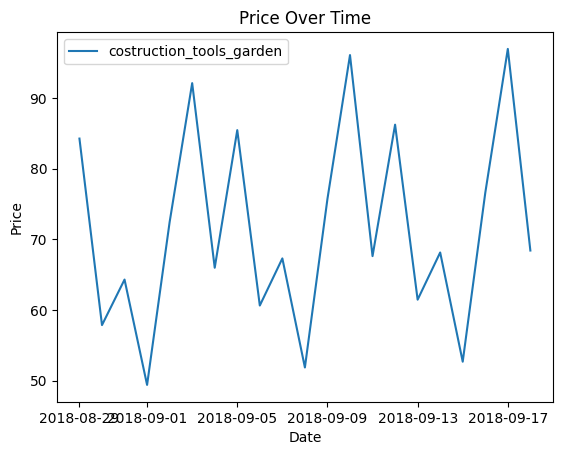

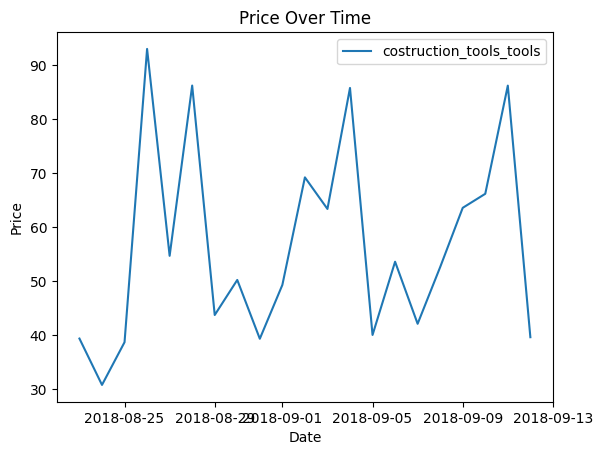

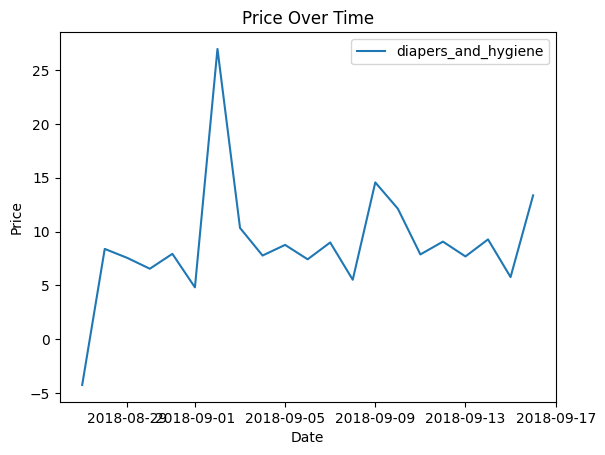

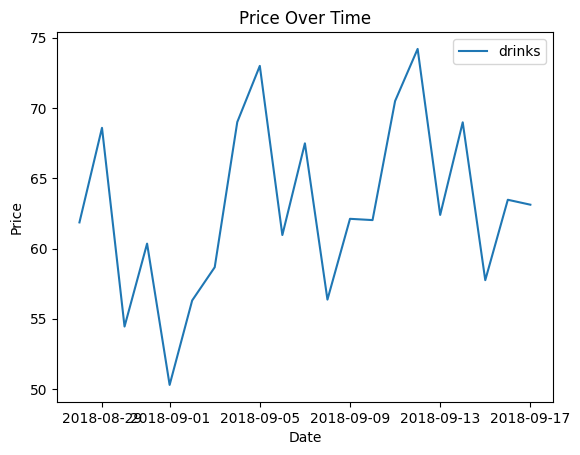

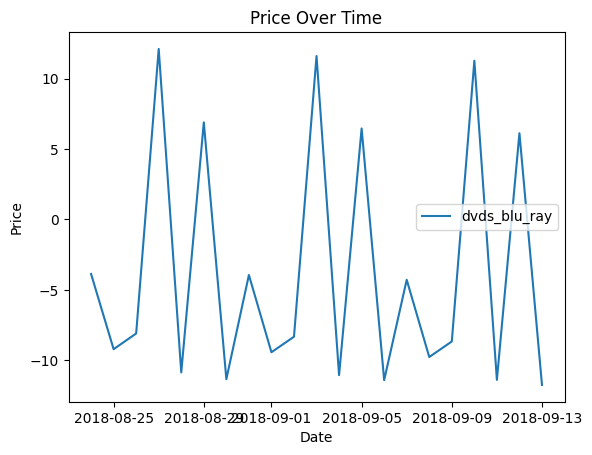

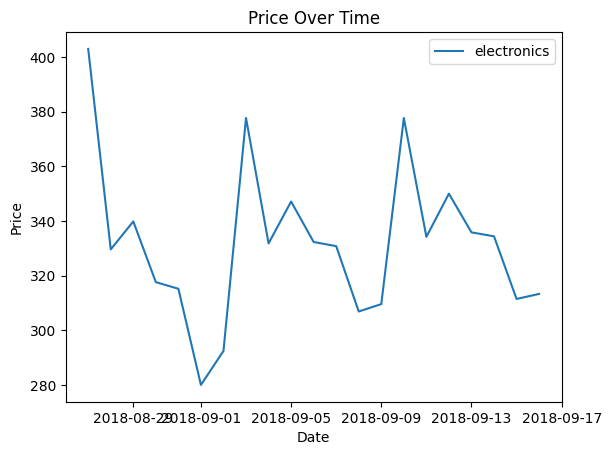

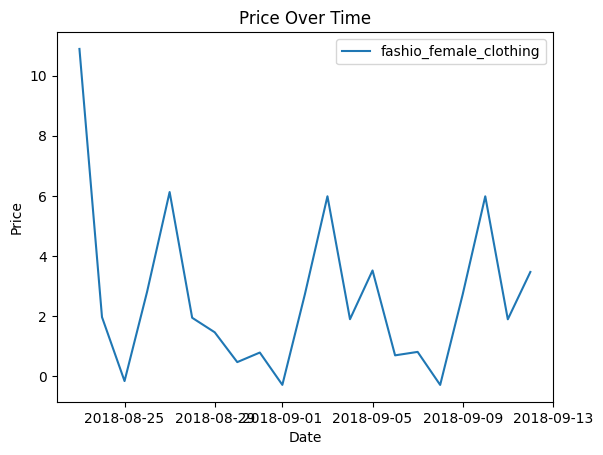

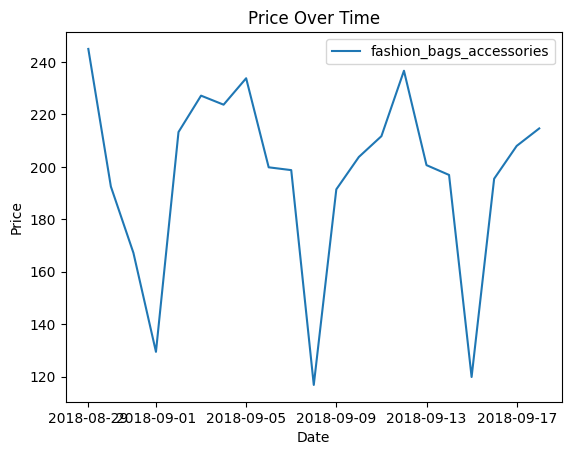

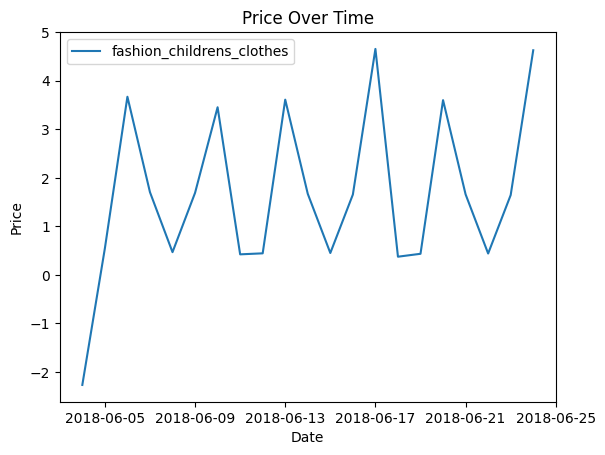

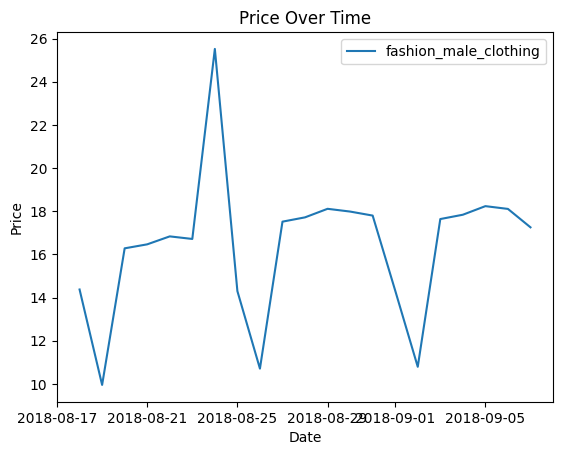

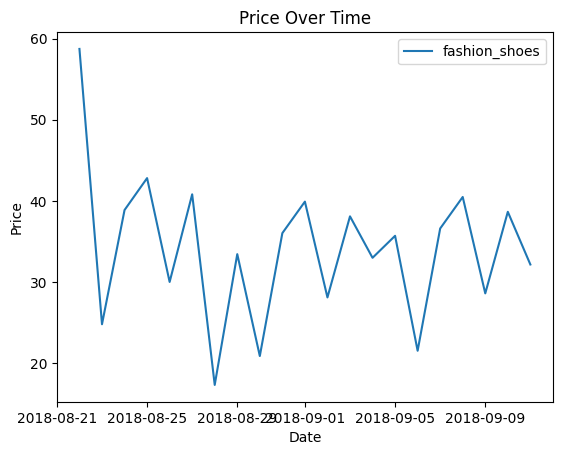

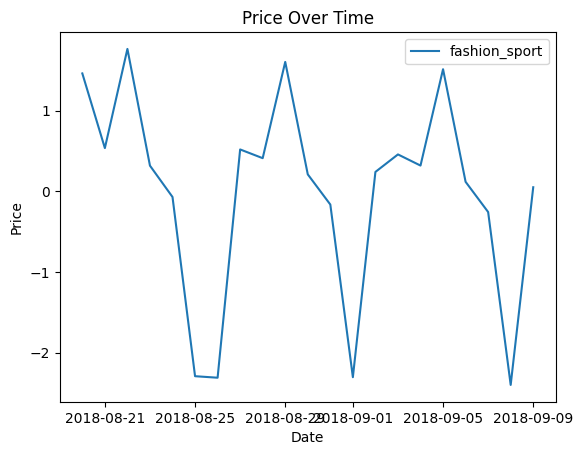

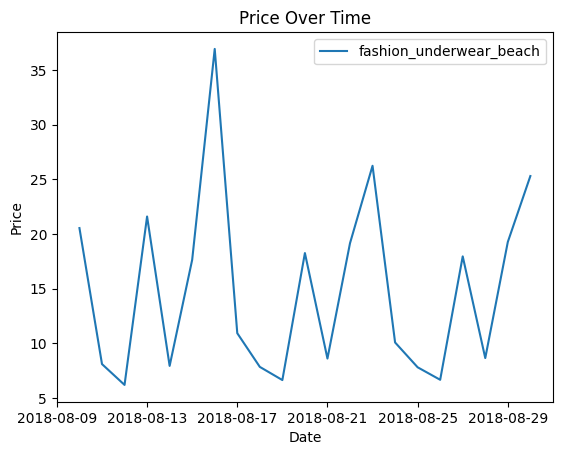

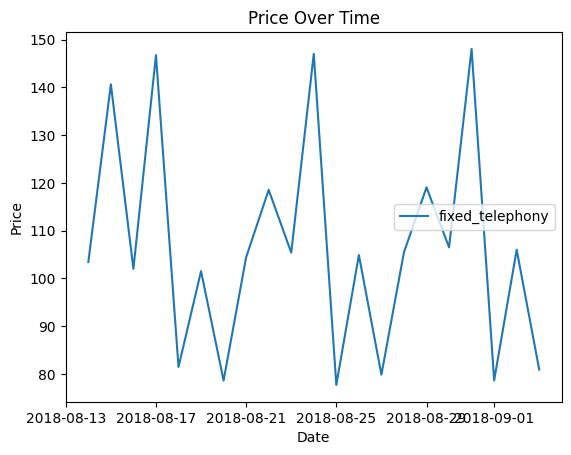

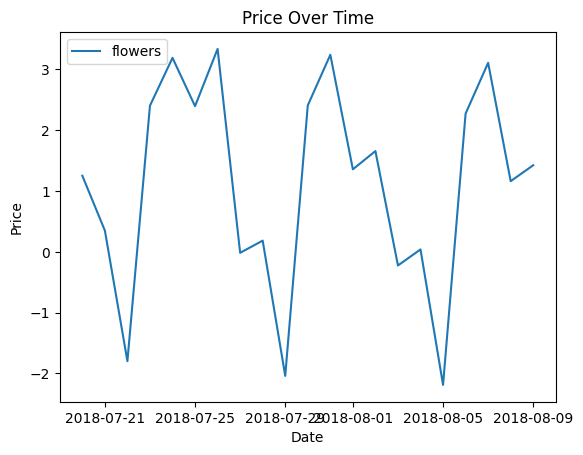

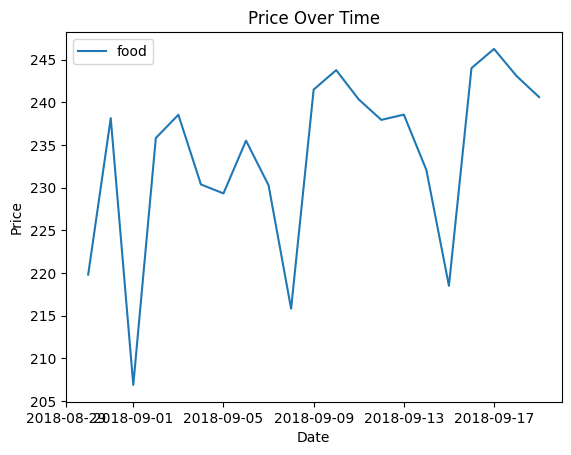

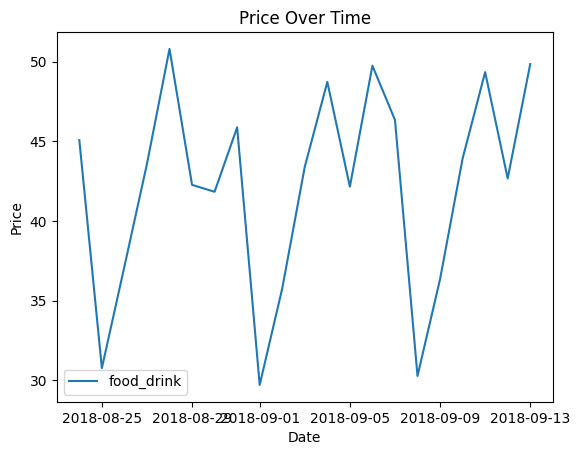

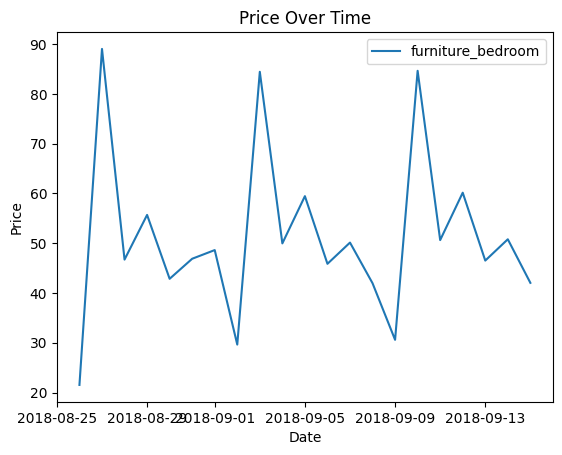

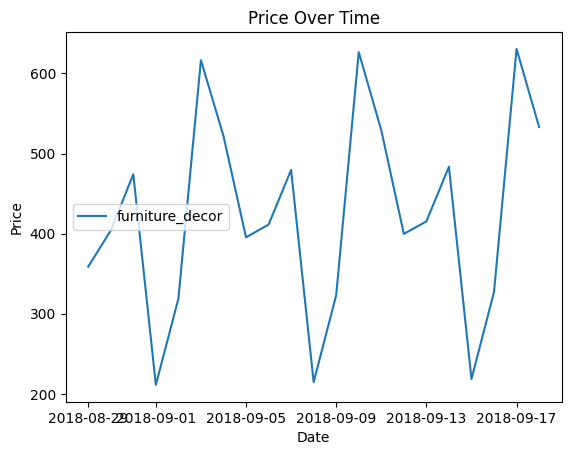

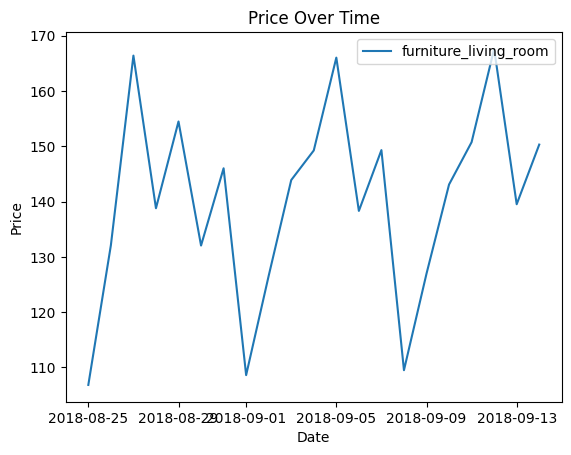

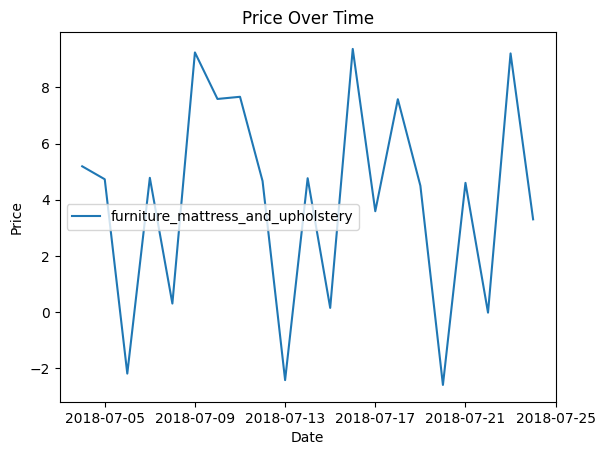

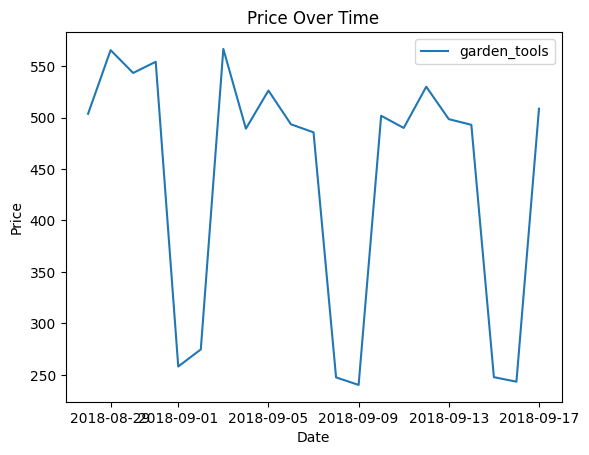

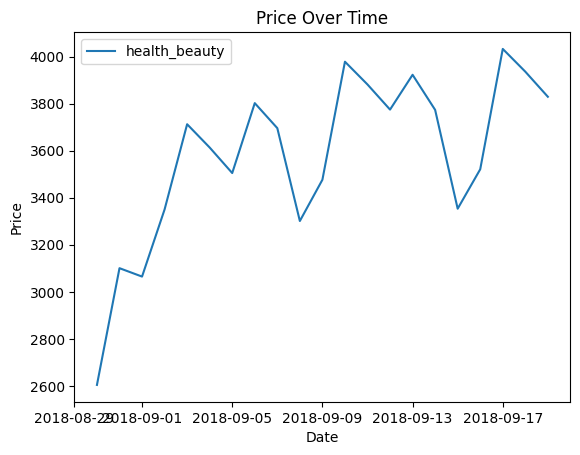

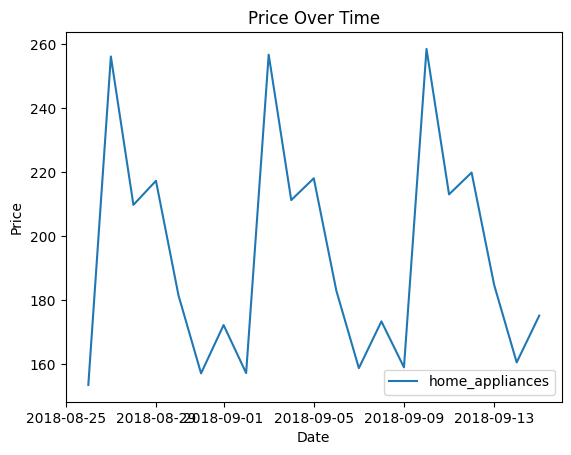

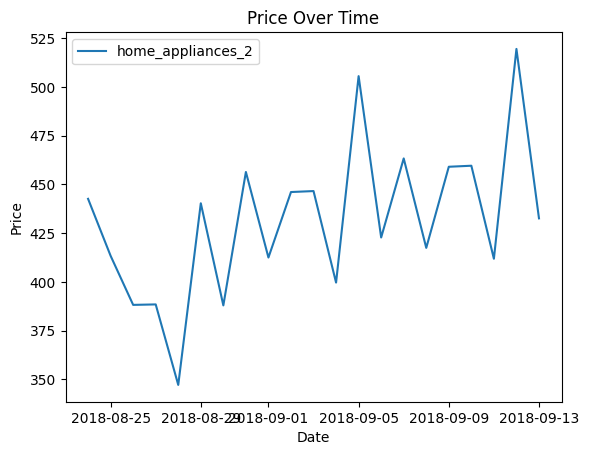

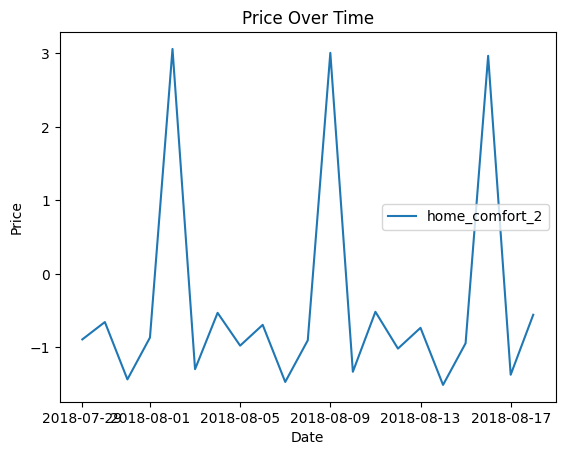

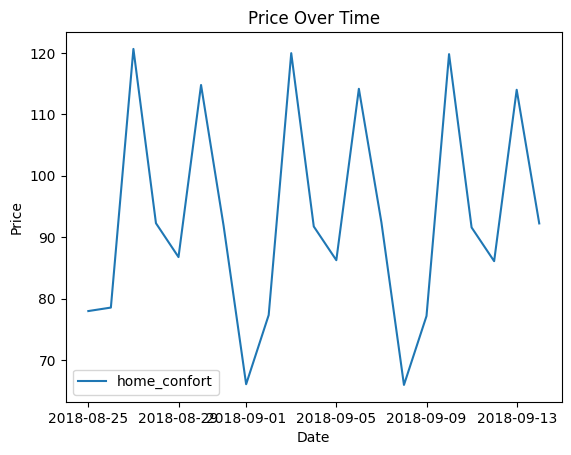

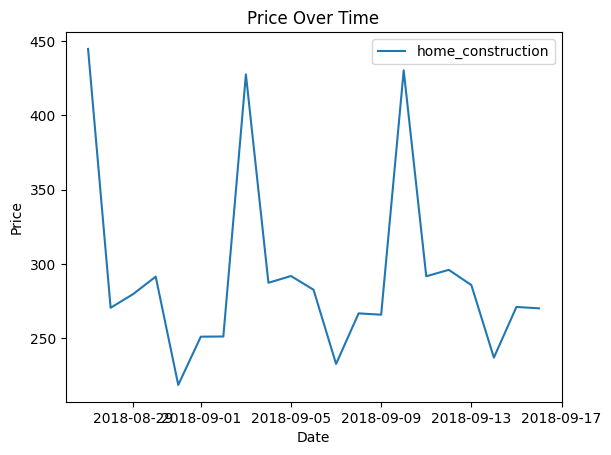

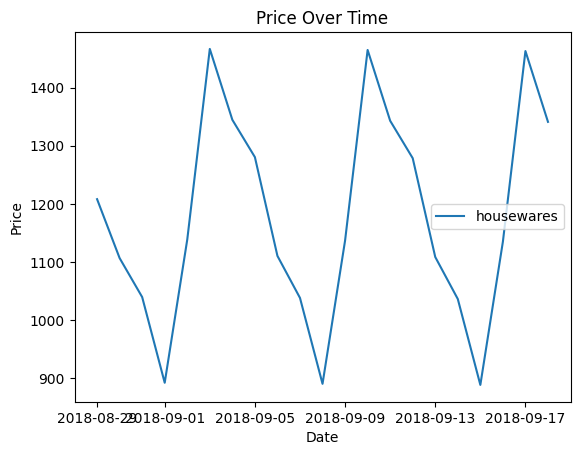

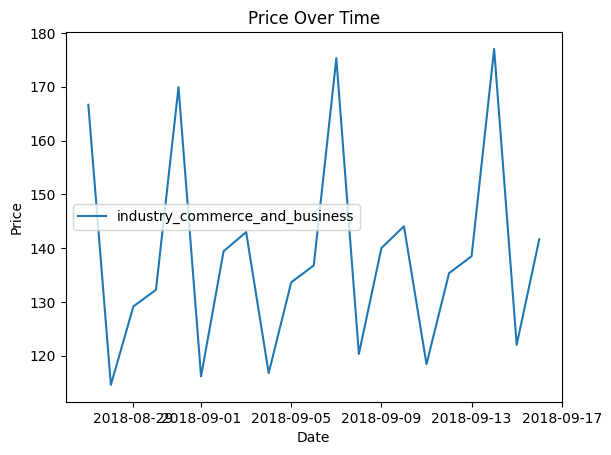

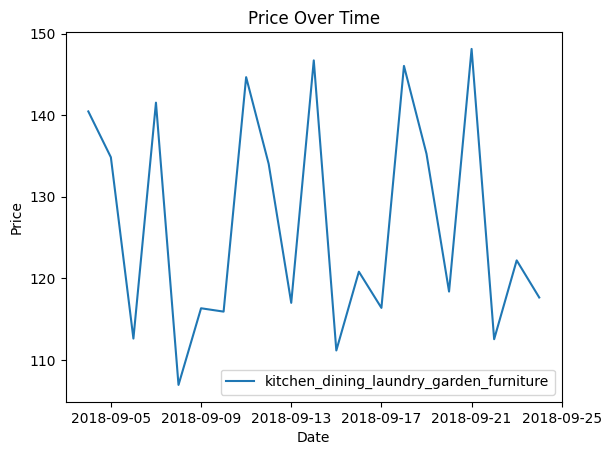

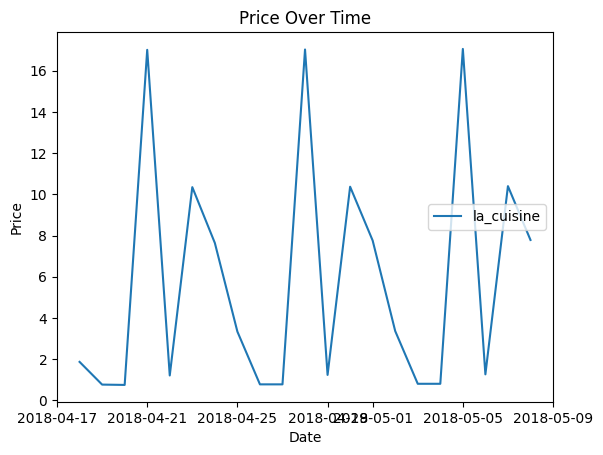

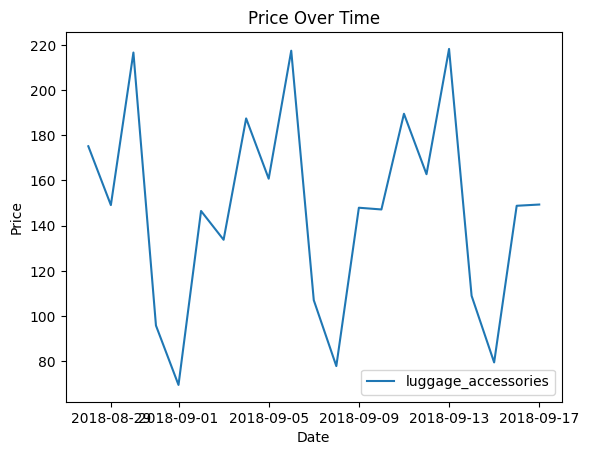

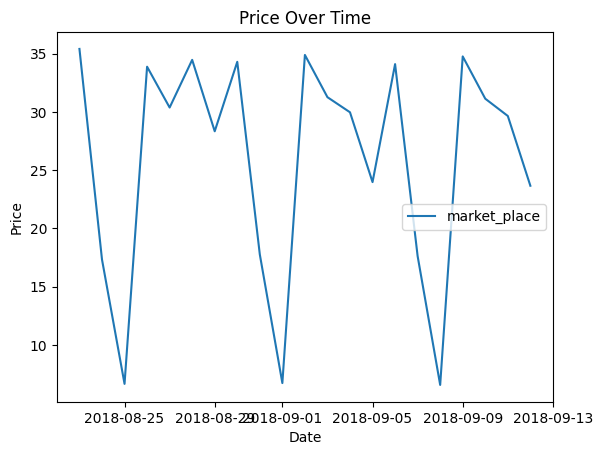

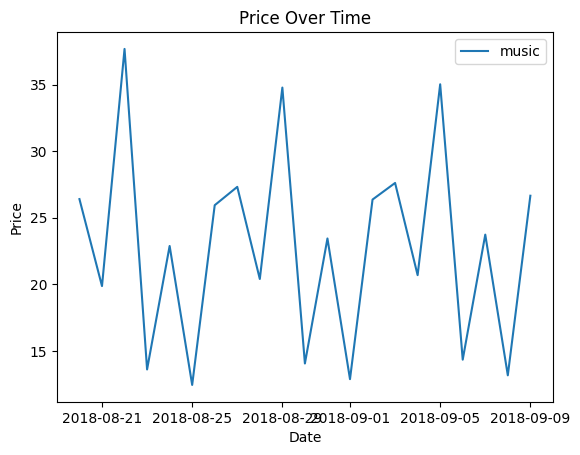

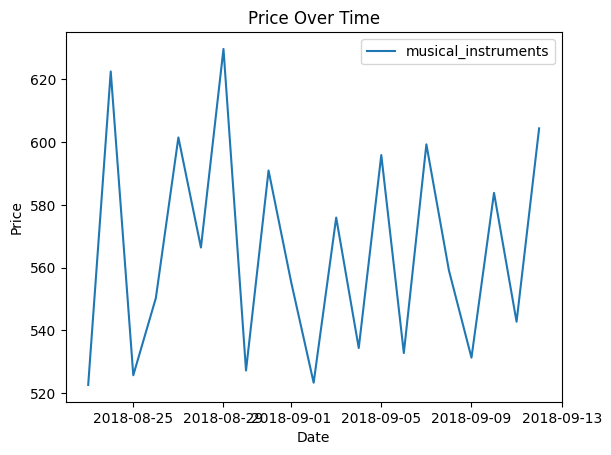

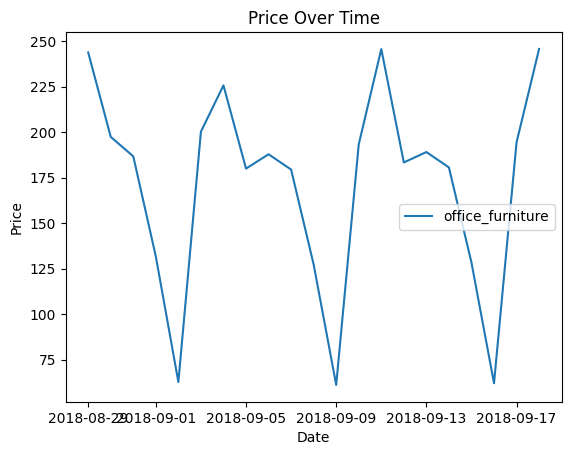

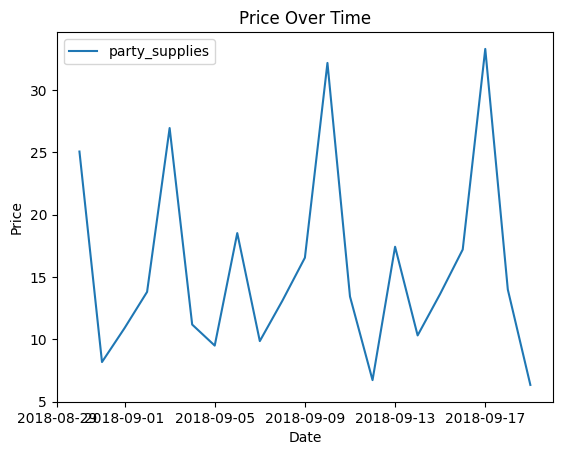

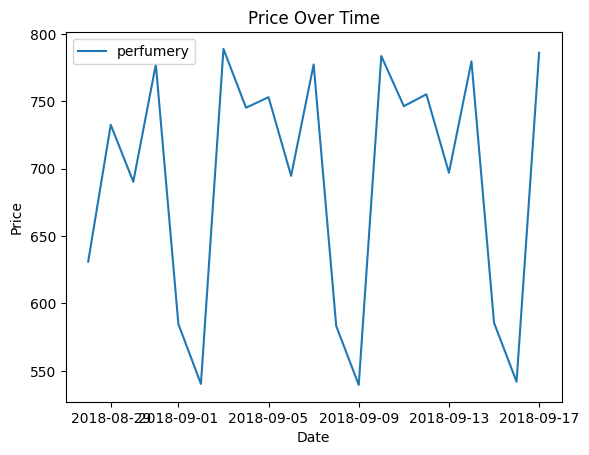

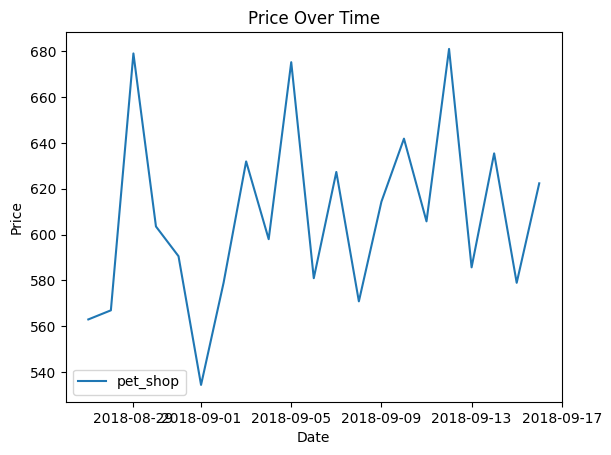

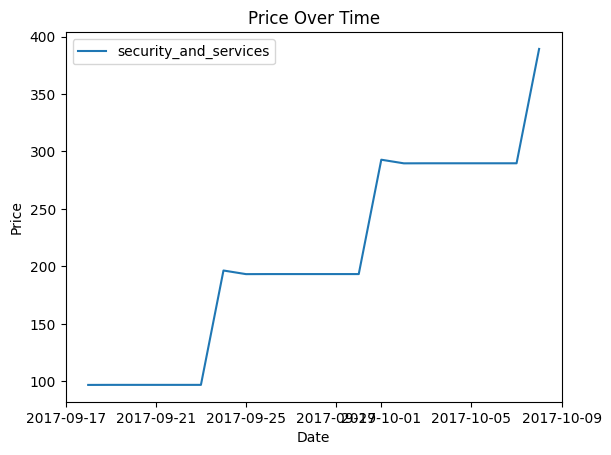

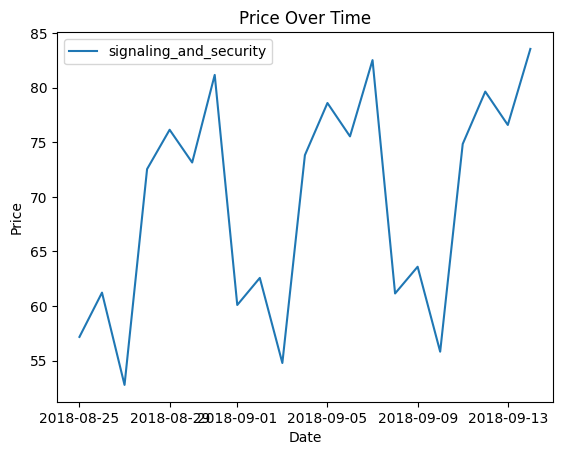

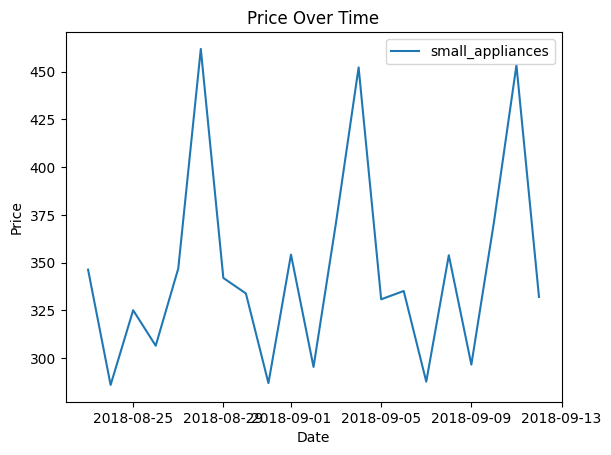

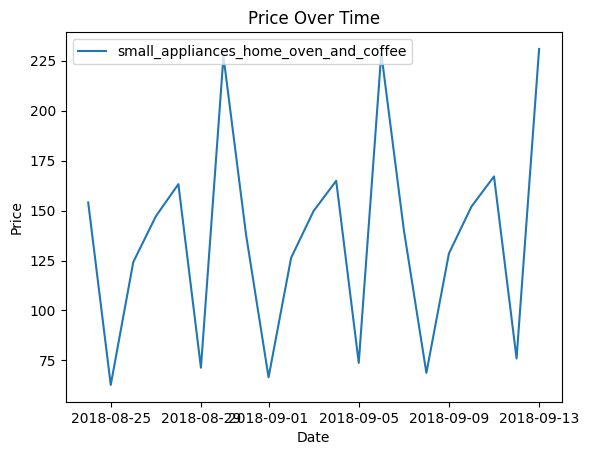

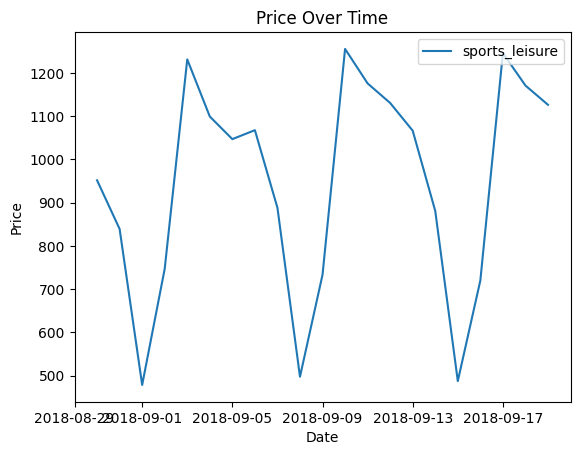

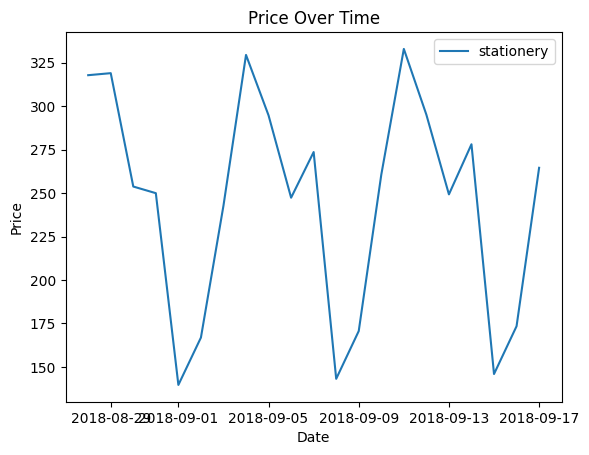

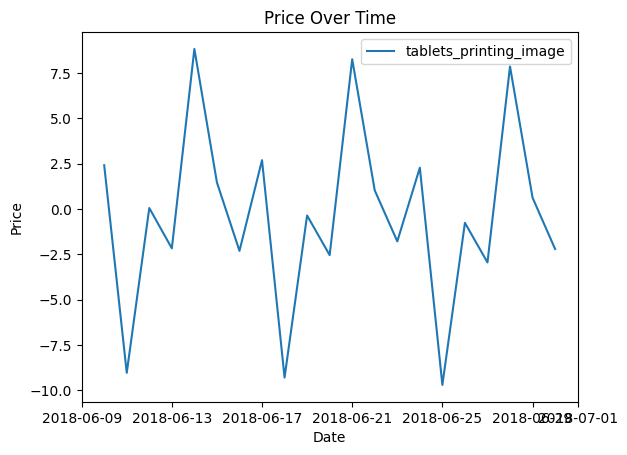

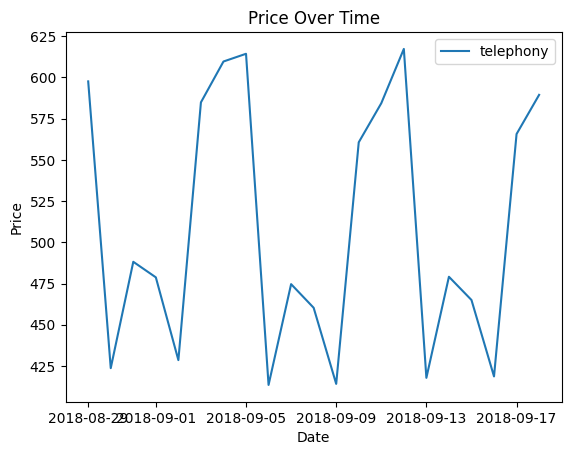

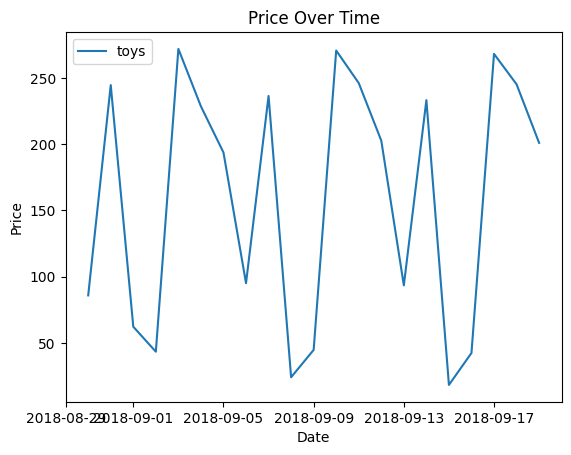

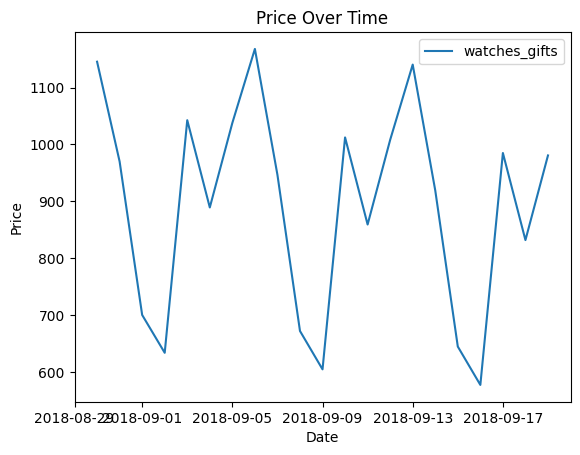

In [2]:
from matplotlib import pyplot as plt

for category, forecast in demand_forecast.items():
    plt.plot(forecast, label=category)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Over Time')
    plt.legend()
    plt.show()